Predicts whether the bank should approves the loan of an applicant based on his profit using Decision Tree and Ensemble Learning Methods.

## import librareis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
kFold = StratifiedKFold(n_splits=5)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

### Reading files 

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# consuime sammary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Summary
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Checking For Null Values

In [5]:
df.isnull().sum().sum()

0

In [6]:
# unique values in purpose attribute
df.purpose.value_counts() 

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

### Encoding

We will be using Label Encoder to convert labels available in purpose attribute.

It will Encode purpose labels with value between 0 and n_classes-1(5).

In [7]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df[20:50]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
20,1,0,0.0800,188.02,11.225243,16.08,772,4888.958333,29797,23.2,1,0,0,0
21,1,0,0.0863,474.42,10.819778,2.59,797,11951.000000,5656,27.6,0,0,0,0
22,1,1,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0
23,1,1,0.0788,484.85,11.736069,7.05,782,5640.041667,16931,34.6,1,0,0,0
24,1,2,0.1229,320.19,11.264464,8.80,672,3760.958333,4822,58.1,0,0,1,0
25,1,0,0.0901,159.03,12.429216,10.00,712,1553.958333,14354,36.6,0,2,0,0
26,1,0,0.0743,155.38,11.082143,0.28,802,4649.958333,1576,5.7,1,0,0,0
27,1,2,0.1375,255.43,9.998798,14.29,662,1318.958333,4175,51.5,0,1,0,0
28,1,0,0.0743,155.38,12.206073,0.28,772,4516.958333,3164,13.7,0,0,0,0
29,1,0,0.0743,155.38,12.206073,3.72,812,6778.958333,85607,0.7,0,0,0,0


## Data Visualization

Text(0.5, 0, 'FICO')

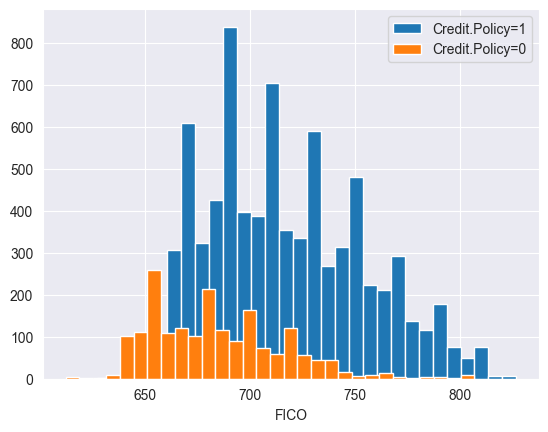

In [9]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1],bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0],bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

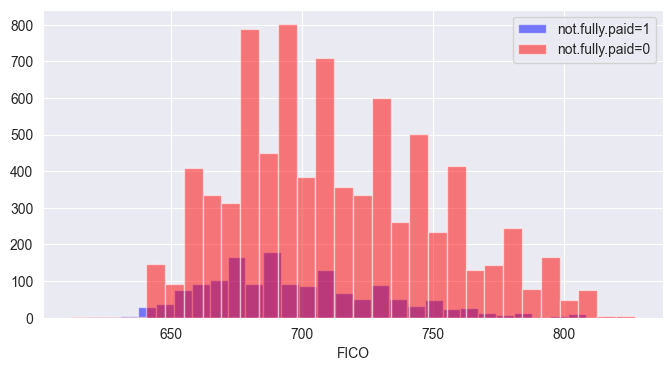

In [10]:
plt.figure(figsize=(8,4))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

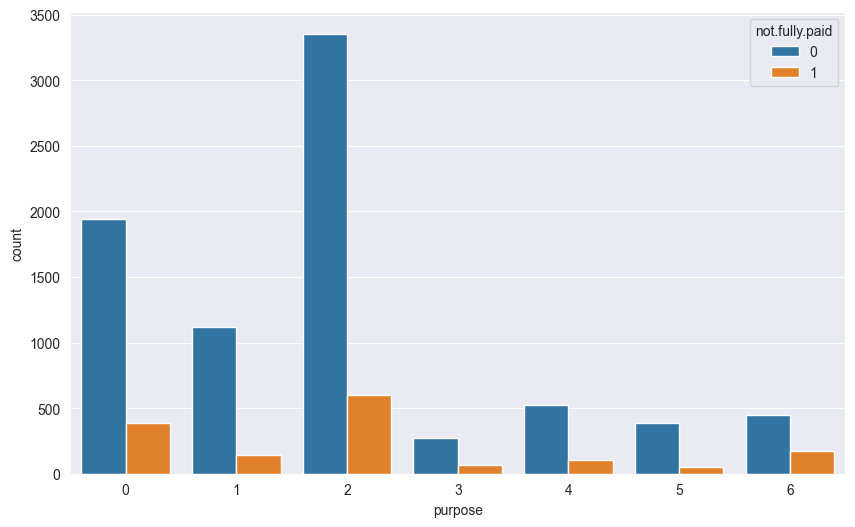

In [11]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

<Figure size 1000x600 with 0 Axes>

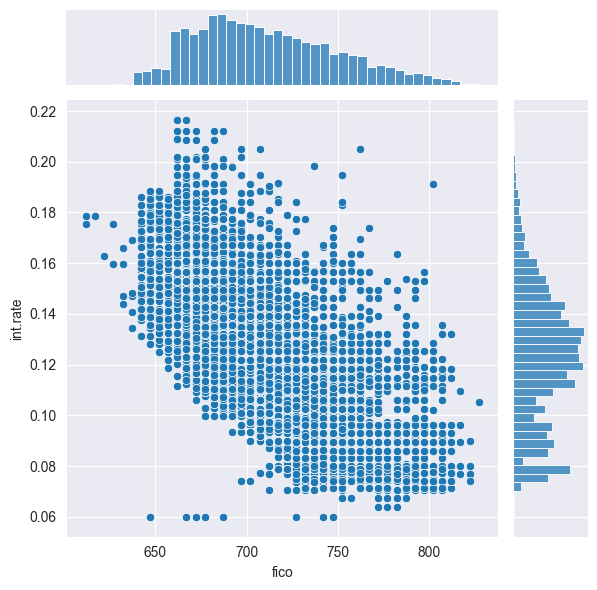

In [12]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico',y='int.rate',data=df)

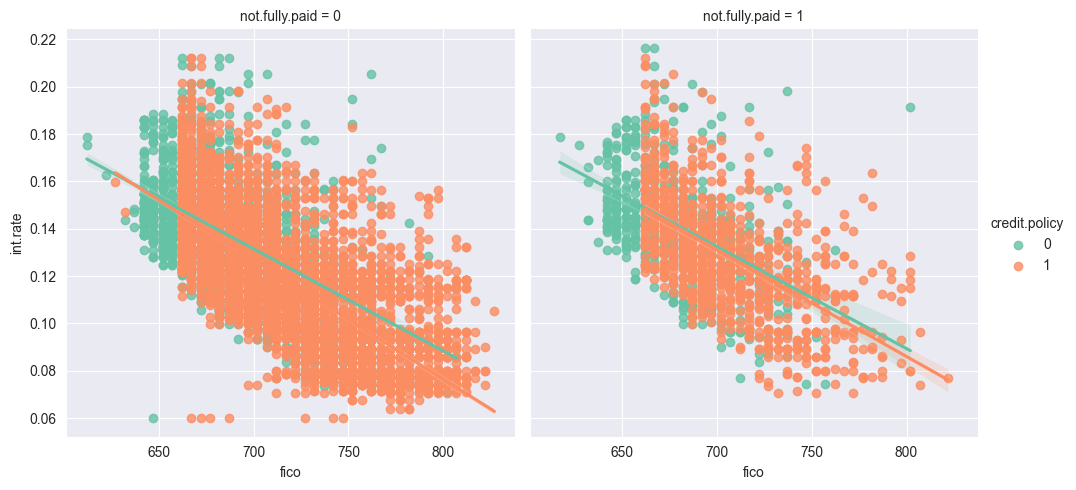

In [13]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

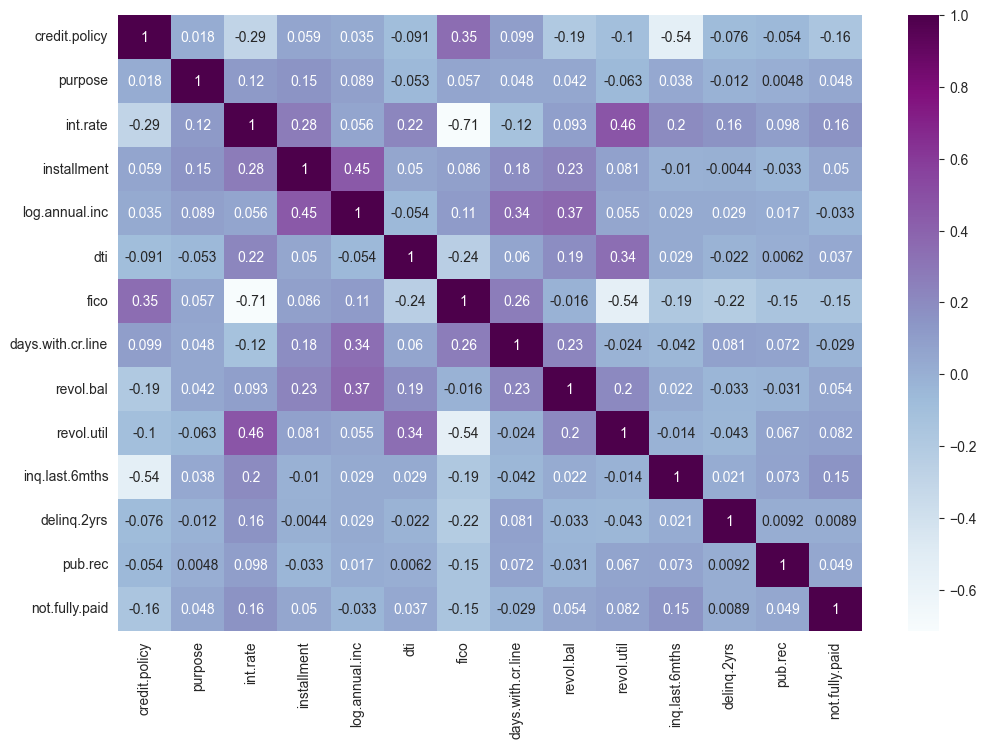

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

### Train-Test Split

Splitting the dataset for training and testing purpose.

In [15]:
# drop the target class it is "not.fully.paid"
X=df.drop("not.fully.paid",axis=1)
y=df["not.fully.paid"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,train_size=.7,random_state=101)

In [17]:
X_train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
4845,1,2,0.1426,548.90,10.714418,14.67,682,3959.958333,9092,23.2,0,0,0
6910,1,0,0.0774,312.19,10.819778,0.86,772,5190.041667,2232,6.5,0,0,0
8146,0,2,0.1520,208.59,10.491274,18.53,642,3270.000000,6970,76.6,4,1,0
7113,1,0,0.1385,511.56,10.950807,12.74,682,3420.041667,21113,72.6,2,0,0
195,1,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0


In [18]:
y_train

4845    1
6910    0
8146    1
7113    0
195     0
       ..
599     0
5695    1
8006    0
1361    0
1547    0
Name: not.fully.paid, Length: 6704, dtype: int64

# Modellng

## 1.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
data_classification = DecisionTreeClassifier()
# This grid search is commonly used for hyperparameter tuning in decision tree-based models
param_grid = {'max_depth' : [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(data_classification,param_grid,cv=kFold,scoring='recall_weighted',return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15,
                                       20]},
             return_train_score=True, scoring='recall_weighted')

In [20]:
grid_search.best_params_

{'max_depth': 2}

In [21]:
data_classification = DecisionTreeClassifier(max_depth=2)
data_classification.fit(X_train,y_train)

y_pred_train = data_classification.predict(X_train)
y_pred_test = data_classification.predict(X_test)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [22]:
print(f"Confusion Matrix is \n {confusion_matrix(y_test,y_pred_test)}")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("<---------------Accuracy Scores------------------->\n")
print(f"Train Accuracy Score is {train_accuracy} ")
print(f"Test Accuracy Score is {test_accuracy}")

Confusion Matrix is 
 [[2431    0]
 [ 443    0]]
<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

<---------------Accuracy Scores------------------->

Train Accuracy Score is 0.8374105011933174 
Test Accuracy Score is 0.8458594293667363


### **2.Bagging** with Decision Tree

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,bootstrap=True)
score = cross_val_score(estimator=bag_dt,X=X_scaled,y=y,scoring='recall_weighted',cv=kFold,n_jobs=1)
print(f"Mean_Score{score.mean()}") 
# Bagging is not improving the score of model and giving only 73.10% of mean Score.

Mean_Score0.7310162599410215


## 3.AdaBoosting with Decision Tree

In [28]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),learning_rate=.5)
adaboost_clf.fit(X_train,y_train)
print(f"Train_Score {adaboost_clf.score(X_train,y_train):.2f} ")
print(f"Test_Score {adaboost_clf.score(X_test,y_test):.2f} ")
# It giving the same result of 84% and not improving our Model.

Train_Score 0.85 
Test_Score 0.84 


## 4.Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train,y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test  = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy  = accuracy_score(y_test,y_pred_test)

In [43]:
print(f"Confusion Matrix is\n {confusion_matrix(y_test,y_pred_test)}")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("<-------------------Accuracy_Scores---------------------->\n")
print(f"Train_accuracy is {train_accuracy}")
print(f"Test_accuracy is {test_accuracy}")

Confusion Matrix is
 [[2421   10]
 [ 433   10]]
<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

<-------------------Accuracy_Scores---------------------->

Train_accuracy is 1.0
Test_accuracy is 0.8458594293667363


### 5.AdaBoosting with RandomForest

In [33]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
#print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
#print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [34]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2420   11]
 [ 434    9]]
<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.45      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8451635351426583


### 6.Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate=.05)
gb_clf.fit(X_train,y_train)

y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [38]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2421   10]
 [ 436    7]]
<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.41      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874

<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8448155880306193


We are Computing different **Ensemble Learning Technologies**, We Found that Most of the **Bagging and Boosting** algo are giving similar result with minimum difference in accuracy. Even though in all these Ensembles-

We Found that the **Best Model for this DataSet is Random Forest with Accuracy of 85%.**

## XGBoosting Classifier

In [51]:
from xgboost import XGBRFClassifier
xgb_clf = XGBRFClassifier(n_estimators = 600, learning_rate = 0.1)
xgb_clf.fit(X_train,y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [47]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[2431    0]
 [ 443    0]]
<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

<---------------Accuracy Scores------------------->

Test Accuracy score: 0.8458594293667363
